### Terminal operatinos

In [ ]:
# ! pip list

In [ ]:
# ! git clone https://github.com/s-elo/I-am-a-painter.git

In [ ]:
# ! cd I-am-a-painter && git pull

### Directly submit the results images.zip if provided at input

In [ ]:
# ! cp -Rf /kaggle/input/images.zip /kaggle/working

### Environment setup

In [ ]:
# move dataset
# ! mkdir ./I-am-a-painter/dataset
# ! cp -Rf ../input/gan-getting-started/* ./I-am-a-painter/dataset
# import os
# os.listdir('/kaggle')

In [ ]:
# download the libs
! pip install git+https://github.com/tensorflow/examples.git

In [7]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('./I-am-a-painter')

# import own modules
from dataLoader import get_dataset
from model import get_model

os.environ['CUDA_VISIBLE_DEVICES'] = '0,1'

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

Physical devices cannot be modified after being initialized


### Loading data
- download the data **monet_tfrec** and **photo_tfrec** in the dataset folder.
- [config kaggle API](https://github.com/Kaggle/kaggle-api)

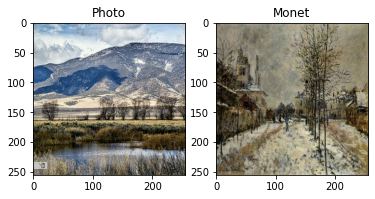

In [8]:
monet_ds, photo_ds = get_dataset()

example_monet = next(iter(monet_ds))
example_photo = next(iter(photo_ds))

plt.subplot(121)
plt.title('Photo')
plt.imshow(example_photo[0] * 0.5 + 0.5)

plt.subplot(122)
plt.title('Monet')
plt.imshow(example_monet[0] * 0.5 + 0.5)

### Training

In [9]:
ganModel = get_model()

ganModel.fit(
    tf.data.Dataset.zip((monet_ds, photo_ds)),
    epochs=25
)

Epoch 1/25


2022-04-13 10:16:15.963240: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


300/300 [==============================] - 108s 233ms/step - monet_gen_loss: 5.3338 - photo_gen_loss: 5.3402 - monet_disc_loss: 0.6896 - photo_disc_loss: 0.7007
Epoch 2/25
300/300 [==============================] - 70s 232ms/step - monet_gen_loss: 3.7621 - photo_gen_loss: 3.7095 - monet_disc_loss: 0.6468 - photo_disc_loss: 0.6622
Epoch 3/25
300/300 [==============================] - 70s 232ms/step - monet_gen_loss: 3.5397 - photo_gen_loss: 3.5090 - monet_disc_loss: 0.6401 - photo_disc_loss: 0.6529
Epoch 4/25
300/300 [==============================] - 69s 232ms/step - monet_gen_loss: 3.4364 - photo_gen_loss: 3.4023 - monet_disc_loss: 0.6313 - photo_disc_loss: 0.6446
Epoch 5/25
300/300 [==============================] - 69s 231ms/step - monet_gen_loss: 3.2863 - photo_gen_loss: 3.2982 - monet_disc_loss: 0.6340 - photo_disc_loss: 0.6364
Epoch 6/25
300/300 [==============================] - 69s 232ms/step - monet_gen_loss: 3.1489 - photo_gen_loss: 3.1879 - monet_disc_loss: 0.6322 - photo_di

### Show some reuslts

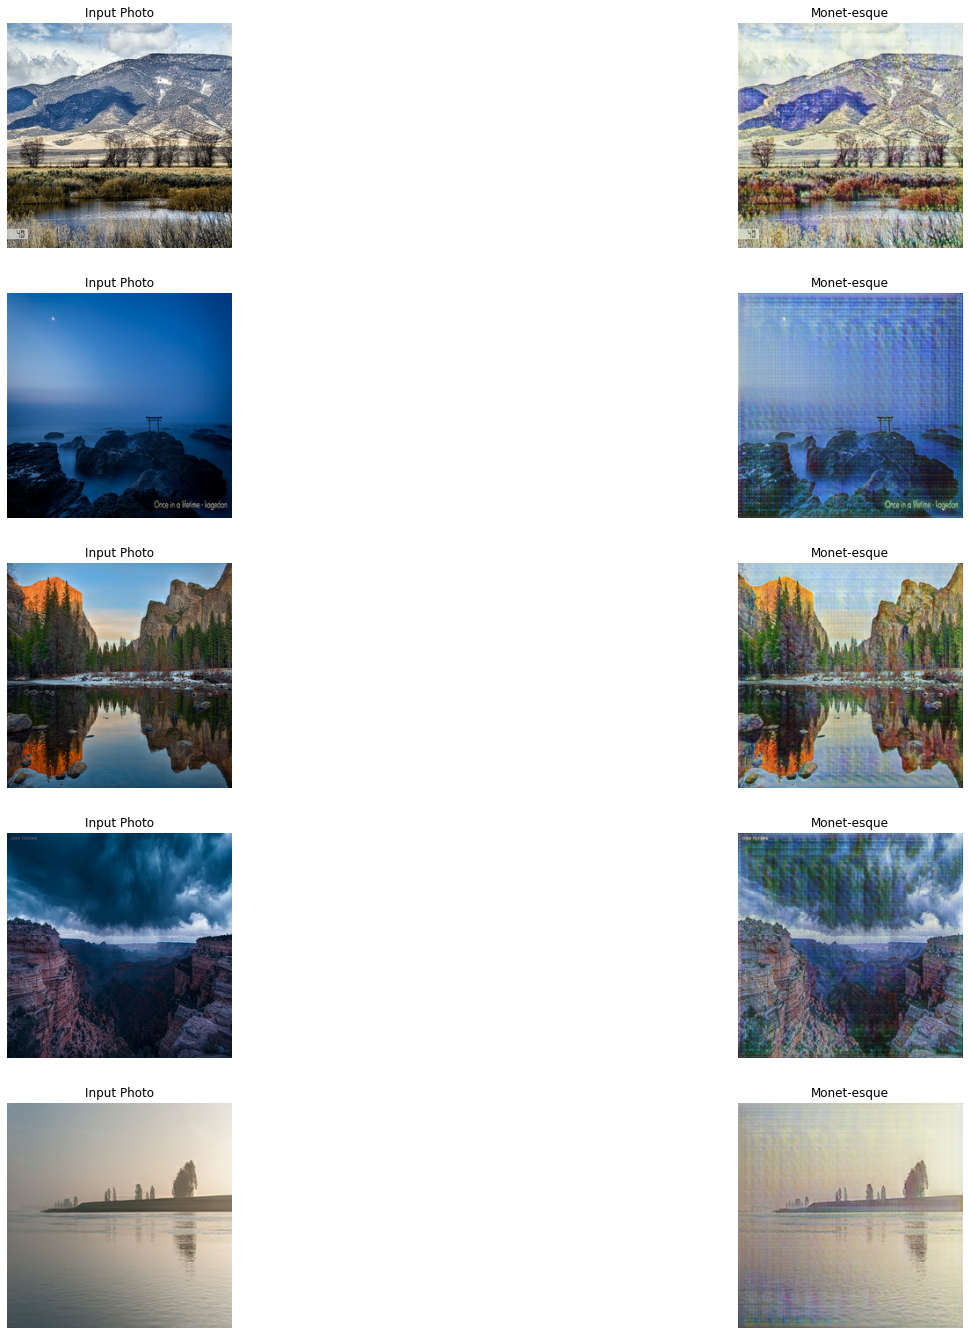

In [10]:
monet_generator = ganModel.m_gen

_, ax = plt.subplots(5, 2, figsize=(24, 24))
for i, img in enumerate(photo_ds.take(5)):
    prediction = monet_generator(img, training=False)[0].numpy()
    prediction = (prediction * 127.5 + 127.5).astype(np.uint8)
    img = (img[0] * 127.5 + 127.5).numpy().astype(np.uint8)

    ax[i, 0].imshow(img)
    ax[i, 1].imshow(prediction)
    ax[i, 0].set_title("Input Photo")
    ax[i, 1].set_title("Monet-esque")
    ax[i, 0].axis("off")
    ax[i, 1].axis("off")
plt.show()

### Save as zip

In [11]:
import PIL
! mkdir ../images
i = 1
for img in photo_ds:
    prediction = monet_generator(img, training=False)[0].numpy()
    prediction = (prediction * 127.5 + 127.5).astype(np.uint8)
    im = PIL.Image.fromarray(prediction)
    im.save("../images/" + str(i) + ".jpg")
    i += 1
import shutil
shutil.make_archive("/kaggle/working/images", 'zip', "/kaggle/images")

'/kaggle/working/images.zip'